In [1]:
pip install astropy pandas matplotlib seaborn pandas-profiling fpdf requests

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.9 MB/s eta 0:00:00
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=29fc153c6b5b7061c677e0f509ce928a5fcedaea3c29bf5a87d857df77c1ebcf
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0c2f804be12dc53afaa1459f4b74e20df887246aca3908f7da013462bc7cff10
  Stored in directory: /root

SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                12217 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                            COMMENT The VOTable describes the metadata of the table contained               COMMENT in the following BINTABLE extension.                                    COMMENT Such a BINTABLE extension can be used on its own as a perfectly         COMMENT good table, but the information 

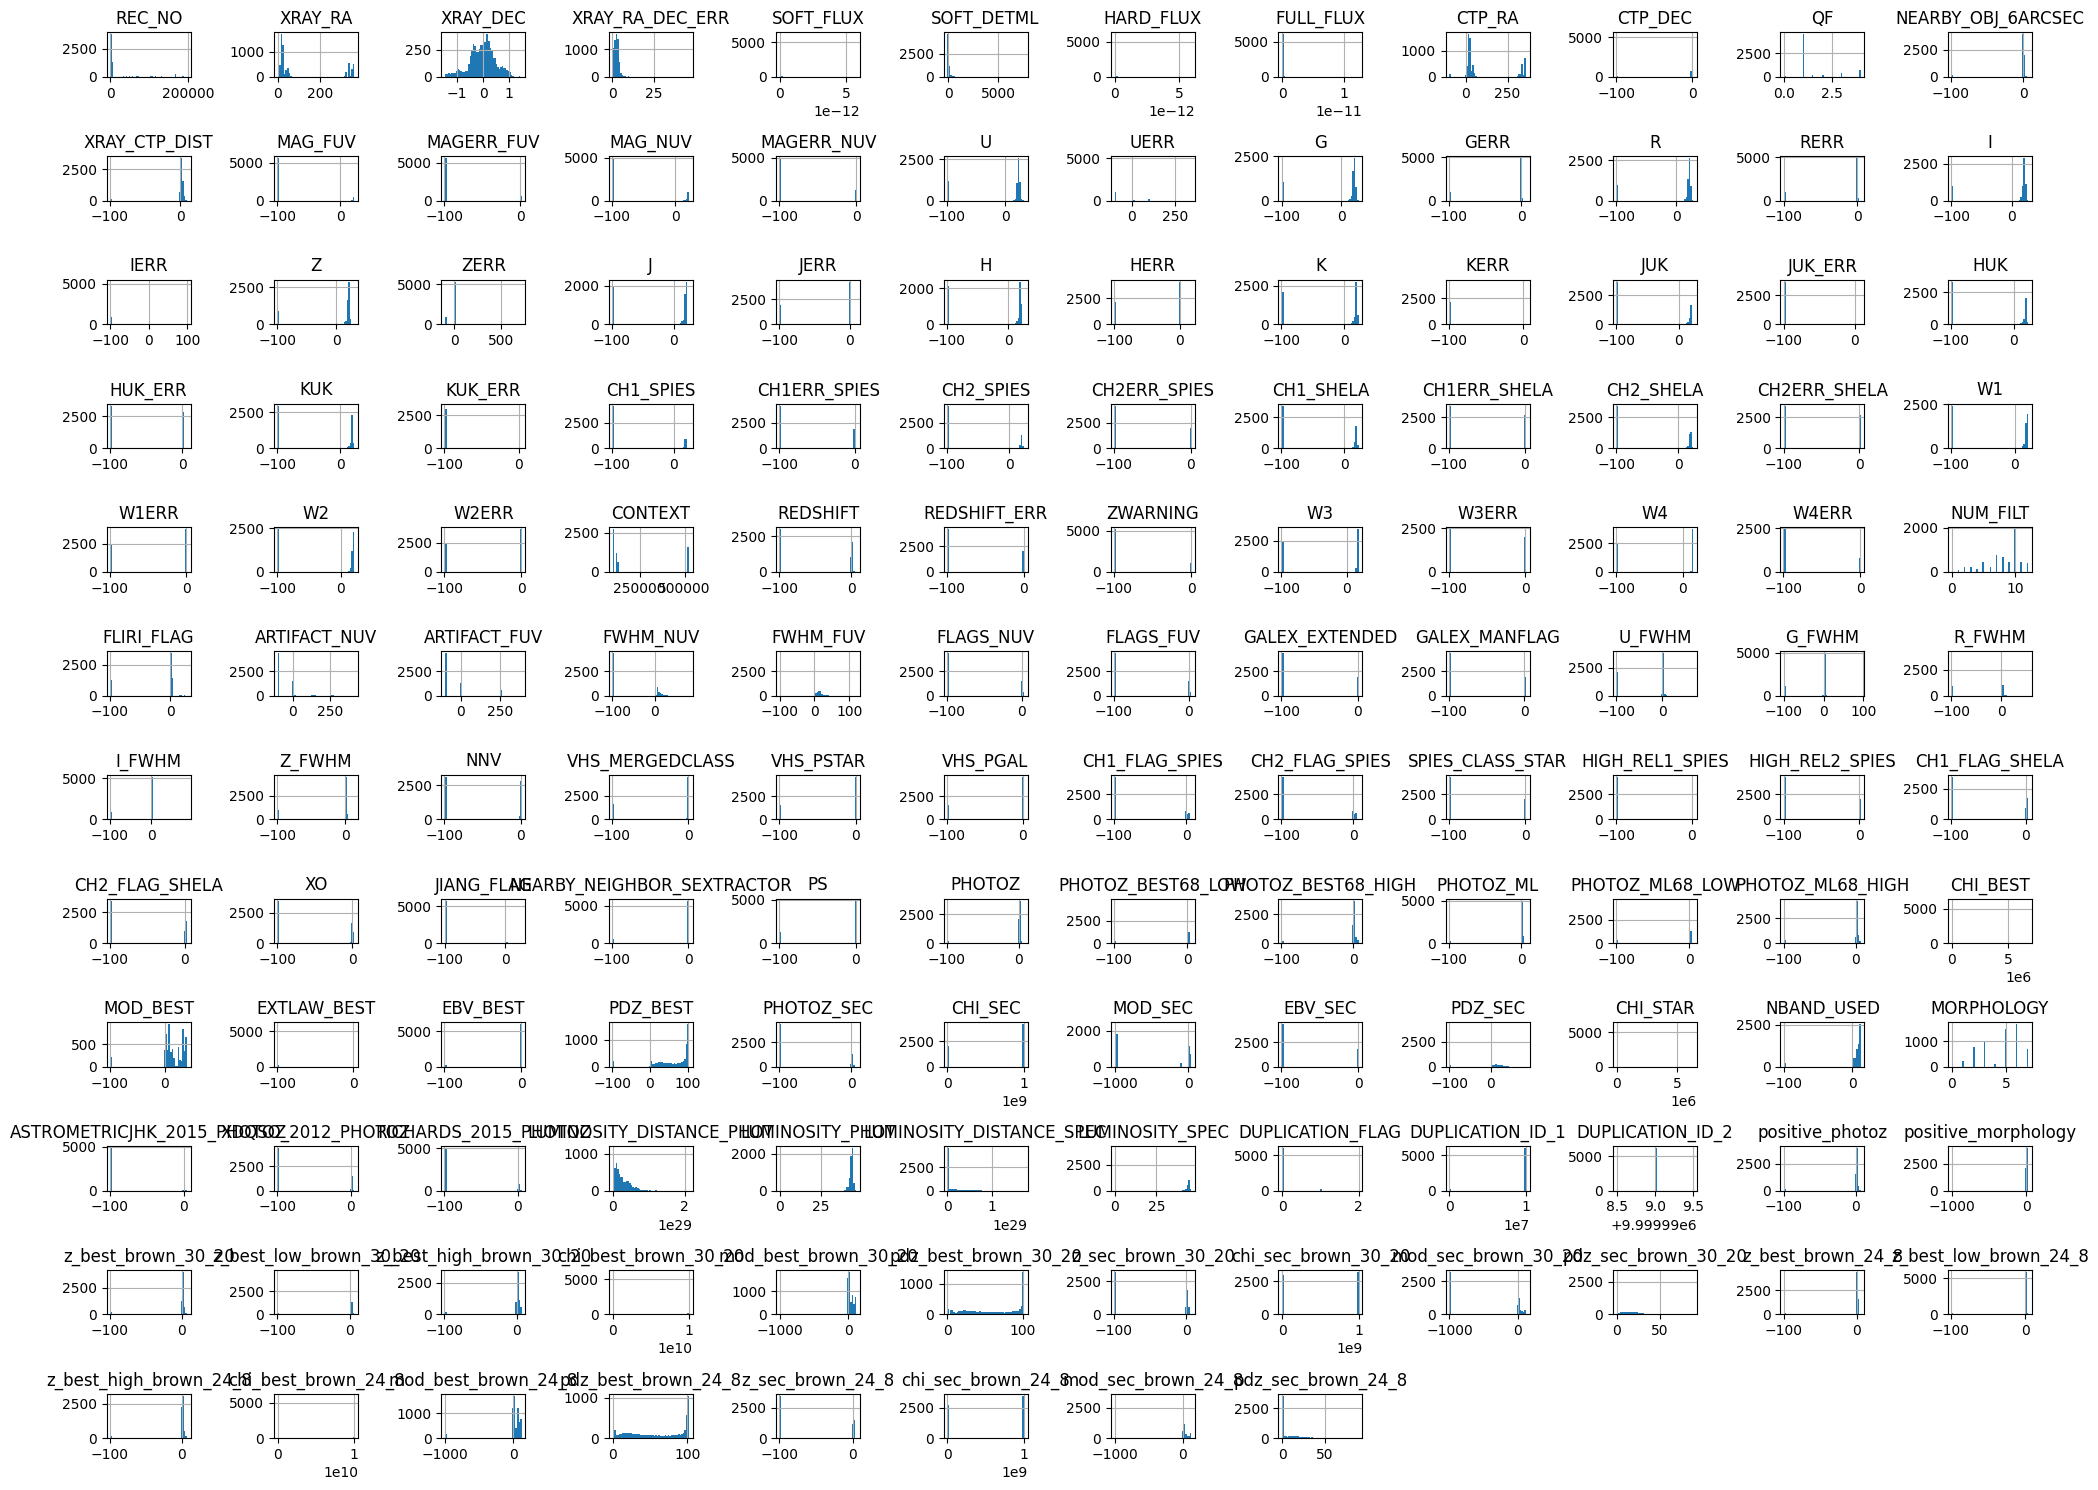

Missing values (in percentage):
 REC_NO                 0.0
CATALOG                0.0
XRAY_RA                0.0
XRAY_DEC               0.0
XRAY_RA_DEC_ERR        0.0
                      ... 
pdz_best_brown_24_8    0.0
z_sec_brown_24_8       0.0
chi_sec_brown_24_8     0.0
mod_sec_brown_24_8     0.0
pdz_sec_brown_24_8     0.0
Length: 156, dtype: float64
Label encoding for column: CATALOG
Label encoding for column: ASSOCIATION
Label encoding for column: RADEC_FROM
Label encoding for column: SDSS_REL_CLASS
Label encoding for column: VHS_REL_CLASS
Label encoding for column: IRAC_REL_CLASS
Label encoding for column: MANUAL_CHECK
Label encoding for column: REDSHIFT_SOURCE
Label encoding for column: SPECOBJID
Label encoding for column: SPEC_CLASS
Label encoding for column: SPEC_SUBCLASS
Label encoding for column: EXT_CORR_FROM
Label encoding for column: COADDED
Label encoding for column: CLASSIFICATION
Label encoding for column: COLOR_MORPHOLOGY
Label encoding for column: SED_NAME


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import requests
from io import BytesIO
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the .fits file from GitHub
url = 'https://github.com/Adrita-Khan/AstroPhotoZ/raw/main/Datasets/Stripe_82X/final_stripe_82X_photozs_brown.fits'
response = requests.get(url)

# Ensure successful request
response.raise_for_status()

fits_file = BytesIO(response.content)

# Step 2: Open the FITS file
with fits.open(fits_file) as hdul:
    # Step 3: Inspect the FITS structure (Header and Data)
    header = hdul[0].header
    data = hdul[1].data

    # Print header and some data
    print(header)
    print(data[:5])  # Print the first 5 rows of data

    # Step 4: Convert FITS data to a Pandas DataFrame
    df = pd.DataFrame(data)

# Step 5: Basic EDA
print(df.info())  # Data types and missing values
print(df.describe())  # Statistical summary of numerical columns

# Step 6: Visualize some basic plots
# Distribution of numerical columns
df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Step 7: Detecting missing values
missing = df.isnull().sum()
missing_percentage = (missing / df.shape[0]) * 100
print("Missing values (in percentage):\n", missing_percentage)

# Step 8: Handle categorical features (if any)
categorical_cols = df.select_dtypes(include='object').columns
if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"Label encoding for column: {col}")
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])



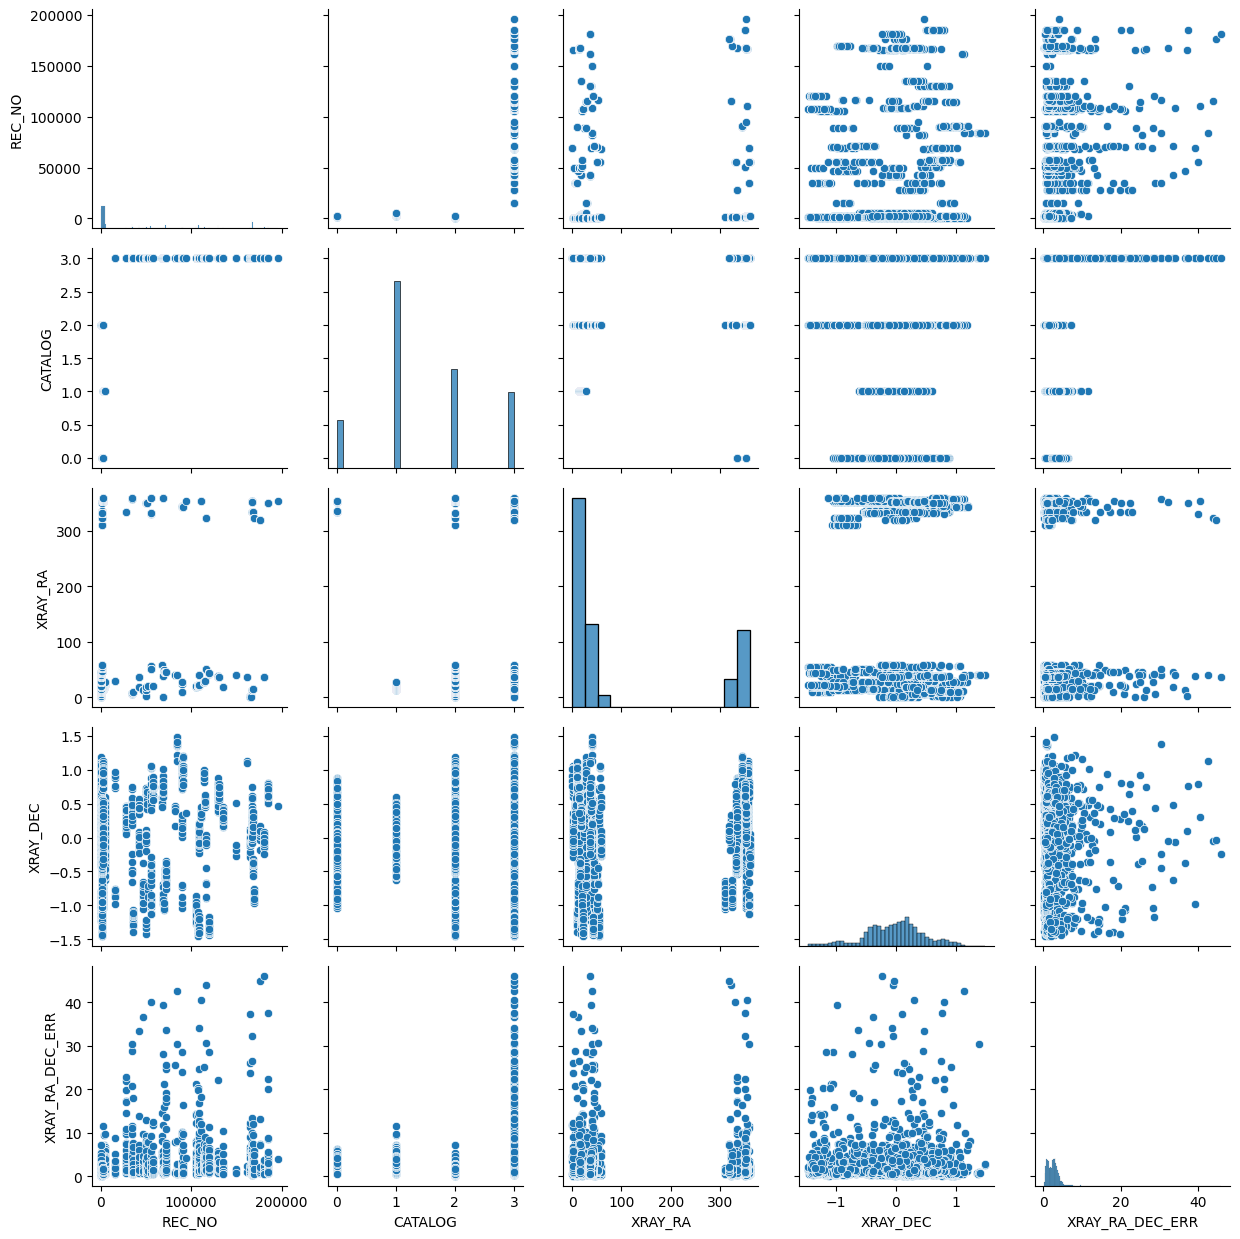

In [7]:
# Step 9: Generate Additional Plots for Insights

# Pairplot for a subset of features
sns.pairplot(df.select_dtypes(include=np.number).iloc[:, :5], height=2.5)

# Save the pairplot to a file
pairplot_filename = "pairplot.png"  # Define the file name for saving the plot
plt.tight_layout()
plt.savefig(pairplot_filename)  # Save the pairplot to a file

# Display the pairplot
plt.show()

# Optionally close the plot if you no longer need it
plt.close()


In [8]:
# Step 3: Inspect the FITS structure (Header and Data)
header = hdul[0].header
data = hdul[1].data

# Print FITS file header information
print("FITS File Header Information:")
print(header)

# Step 5: Basic EDA - Data Summary (Descriptive Statistics)
print("\nData Summary (Descriptive Statistics):")
print(df.describe())  # Statistical summary of numerical columns

# Step 7: Detecting missing values
missing = df.isnull().sum()
missing_percentage = (missing / df.shape[0]) * 100
print("\nMissing Values (in percentage):")
print(missing_percentage)


FITS File Header Information:
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                12217 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                            COMMENT The VOTable describes the metadata of the table contained               COMMENT in the following BINTABLE extension.                                    COMMENT Such a BINTABLE extension can be used on its own as a perfectly         COMMENT go

In [9]:
# Step 11: Data Normalization or Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example: Min-Max Scaling (normalization)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)

# Check the scaled data
print(df_scaled.head())


     REC_NO  CATALOG   XRAY_RA  XRAY_DEC  XRAY_RA_DEC_ERR  SOFT_FLUX  \
0  0.007094      0.0  0.926717  0.377594         0.032914   0.011645   
1  0.007099      0.0  0.926739  0.354549         0.083333   0.014797   
2  0.007104      0.0  0.926861  0.404520         0.054590   0.026293   
3  0.007110      0.0  0.926869  0.620940         0.092296   0.001481   
4  0.007115      0.0  0.926870  0.537543         0.048043   0.002776   

   SOFT_DETML  HARD_FLUX  FULL_FLUX  ASSOCIATION  ...  z_best_brown_24_8  \
0    0.023914   0.000000   0.013227      0.78125  ...           0.950687   
1    0.025389   0.022722   0.019534      0.68750  ...           0.954117   
2    0.092104   0.011864   0.031678      0.75000  ...           0.951712   
3    0.015905   0.004870   0.002466      0.59375  ...           0.964166   
4    0.019608   0.000000   0.003402      0.68750  ...           0.959455   

   z_best_low_brown_24_8  z_best_high_brown_24_8  chi_best_brown_24_8  \
0               0.963213             

In [10]:
# Step 12: Imputation for Missing Values
# Use the median for numerical columns
df.fillna(df.median(), inplace=True)

# Alternatively, for categorical columns:
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

In [12]:
# For categorical data, fill missing values with the mode (most frequent)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
# Step 11: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=np.number))  # Scaling only numerical features
df_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=np.number).columns)

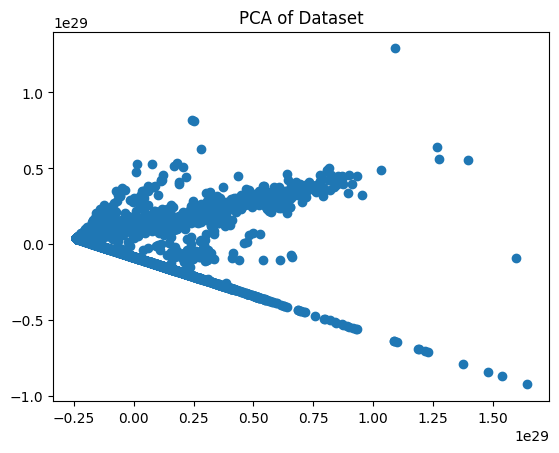

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
df_pca = pca.fit_transform(df.select_dtypes(include=np.number))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA of Dataset")
plt.show()


In [20]:
from sklearn.decomposition import PCA

# Perform PCA with 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.select_dtypes(include=np.number))

# Convert PCA result to DataFrame with column names 'PCA1' and 'PCA2'
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Optionally, join the PCA components back to the original DataFrame
df_with_pca = df.join(df_pca_df)

# Display the new DataFrame with PCA components
print(df_with_pca.head())


   REC_NO  CATALOG     XRAY_RA  XRAY_DEC  XRAY_RA_DEC_ERR     SOFT_FLUX  \
0    1392        0  333.475555 -0.348052         1.639736  6.728302e-14   
1    1393        0  333.483124 -0.415928         3.951285  8.549677e-14   
2    1394        0  333.527130 -0.268740         2.633521  1.519177e-13   
3    1395        0  333.530151  0.368712         4.362236  8.558770e-15   
4    1396        0  333.530365  0.123070         2.333365  1.604026e-14   

   SOFT_DETML     HARD_FLUX     FULL_FLUX  ASSOCIATION  ...  \
0   84.059120  0.000000e+00  1.644900e-13           25  ...   
1   95.350876  1.341292e-13  2.429212e-13           22  ...   
2  606.051941  7.003428e-14  3.939304e-13           24  ...   
3   22.752975  2.874589e-14  3.066302e-14           19  ...   
4   51.097580  0.000000e+00  4.230737e-14           22  ...   

   z_best_high_brown_24_8  chi_best_brown_24_8  mod_best_brown_24_8  \
0                  0.0313           192.378000                   98   
1                  0.4008   

In [21]:
# Save the DataFrame with PCA components to a CSV file
#df_with_pca.to_csv('df_with_pca.csv', index=False)

# Provide a link to download the CSV file
#from google.colab import files
#files.download('df_with_pca.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
df_cleaned = df.dropna()

# Optionally, check the shape before and after dropping rows
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

Original data shape: (6181, 156)
Cleaned data shape: (6181, 156)


In [23]:
# Select only numerical columns (excluding non-numeric columns like headers or identifiers)
df_numeric = df.select_dtypes(include=[np.number])

# Drop rows that do not contain numerical data in all columns (except the heading column)
df_cleaned = df[df_numeric.notna().all(axis=1)]

# Optionally, check the shape before and after dropping rows
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")


Original data shape: (6181, 156)
Cleaned data shape: (6181, 156)


In [24]:
# Define the list of relevant columns for estimating photometric redshift
relevant_columns = [
    'MAG_FUV', 'MAGERR_FUV', 'MAG_NUV', 'MAGERR_NUV',
    'U', 'UERR', 'G', 'GERR', 'R', 'RERR', 'I', 'IERR', 'Z', 'ZERR',
    'J', 'JERR', 'H', 'HERR', 'K', 'KERR', 'W1', 'W1ERR', 'W2', 'W2ERR',
    'PHOTOZ', 'PHOTOZ_BEST68_LOW', 'PHOTOZ_BEST68_HIGH', 'PHOTOZ_ML',
    'PHOTOZ_ML68_LOW', 'PHOTOZ_ML68_HIGH',
    'REDSHIFT', 'REDSHIFT_ERR', 'REDSHIFT_SOURCE',
    'SOFT_FLUX', 'HARD_FLUX', 'FULL_FLUX',
    'CHI_BEST', 'MOD_BEST', 'EXTLAW_BEST', 'EBV_BEST'
]

# Retrieve only the relevant columns from the DataFrame
df_relevant = df[relevant_columns]

# Optionally, check the first few rows of the filtered DataFrame
print(df_relevant.head())


     MAG_FUV  MAGERR_FUV    MAG_NUV  MAGERR_NUV          U    UERR          G  \
0 -99.000000  -99.000000  19.019361    0.033416  15.592768  0.0003 -99.000000   
1 -99.000000  -99.000000  21.114893    0.223517  21.213541  0.0688  20.620443   
2 -99.000000  -99.000000  19.686535    0.042207  14.356454  0.0001 -99.000000   
3 -99.000000  -99.000000 -99.000000  -99.000000  23.561600  0.3310  23.313299   
4  21.815874    0.175187  20.741415    0.060196  20.541595  0.0457  20.385698   

      GERR          R     RERR  ...   REDSHIFT  REDSHIFT_ERR  REDSHIFT_SOURCE  \
0 -99.0000 -99.000000 -99.0000  ... -99.000000     -99.00000               27   
1   0.0183  19.989361   0.0139  ...   1.057000     -99.00000               12   
2 -99.0000 -99.000000 -99.0000  ... -99.000000     -99.00000               27   
3   0.0921  22.753000   0.0845  ... -99.000000     -99.00000               27   
4   0.0153  20.250439   0.0165  ...   0.914107       0.00035               14   

      SOFT_FLUX     HARD_F

In [26]:
# Basic summary statistics
print("\nSummary Statistics:\n", df_relevant.describe())



Summary Statistics:
            MAG_FUV   MAGERR_FUV      MAG_NUV   MAGERR_NUV            U  \
count  6181.000000  6181.000000  6181.000000  6181.000000  6181.000000   
mean    -87.735153   -89.683968   -75.053513   -79.140343    -0.763696   
std      34.977982    28.925243    47.831856    39.666389    47.334259   
min     -99.000000   -99.000000   -99.000000   -99.000000   -99.000000   
25%     -99.000000   -99.000000   -99.000000   -99.000000    19.220205   
50%     -99.000000   -99.000000   -99.000000   -99.000000    21.517296   
75%     -99.000000   -99.000000   -99.000000   -99.000000    23.024147   
max      21.994537     1.547057    21.993290     0.329040    31.219400   

              UERR            G         GERR            R         RERR  ...  \
count  6181.000000  6181.000000  6181.000000  6181.000000  6181.000000  ...   
mean    -12.476732     1.450830   -16.455349     2.337719   -15.404040  ...   
std      41.475975    44.986877    36.936081    43.631214    35.960003  ..

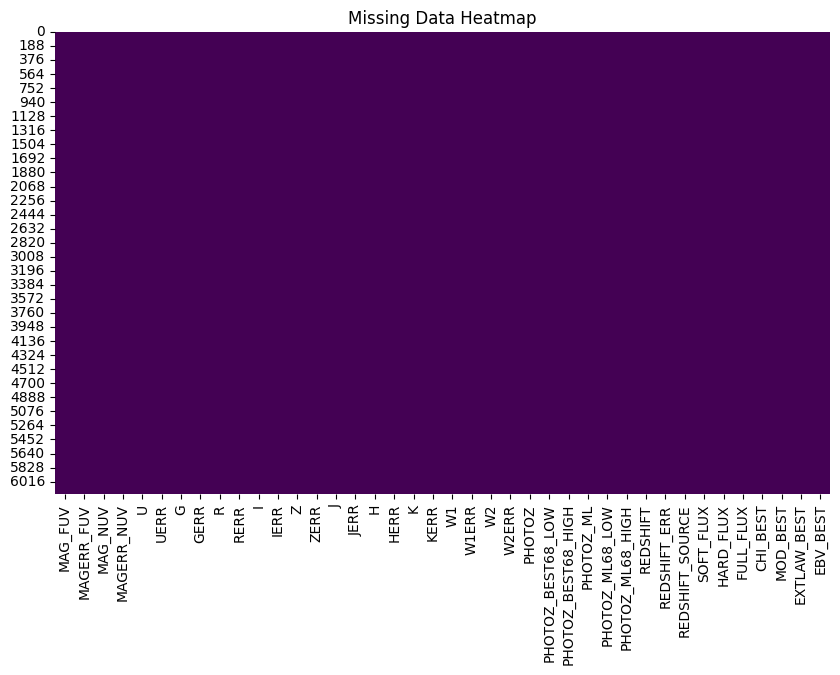

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_relevant.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [29]:
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = np.abs(zscore(df_relevant.select_dtypes(include=np.number)))
outliers = (z_scores > 3)  # Typically, a Z-score greater than 3 indicates an outlier

# Check how many outliers there are
print("\nNumber of outliers in each column:\n", np.sum(outliers, axis=0))



Number of outliers in each column:
 MAG_FUV               578
MAGERR_FUV            581
MAG_NUV                 0
MAGERR_NUV              0
U                       0
UERR                    2
G                       0
GERR                    0
R                       0
RERR                    0
I                       0
IERR                    1
Z                       0
ZERR                   23
J                       0
JERR                    0
H                       0
HERR                    0
K                       0
KERR                    0
W1                      0
W1ERR                   0
W2                      0
W2ERR                   0
PHOTOZ                209
PHOTOZ_BEST68_LOW     209
PHOTOZ_BEST68_HIGH    209
PHOTOZ_ML             285
PHOTOZ_ML68_LOW       285
PHOTOZ_ML68_HIGH      285
REDSHIFT                0
REDSHIFT_ERR            0
REDSHIFT_SOURCE         0
SOFT_FLUX              17
HARD_FLUX              35
FULL_FLUX              33
CHI_BEST               12
M

In [30]:
# Check for constant columns (columns with only one unique value)
constant_columns = [col for col in df_relevant.columns if df_relevant[col].nunique() == 1]
print("\nConstant Columns (with only one unique value):", constant_columns)



Constant Columns (with only one unique value): []


In [31]:
# Check for duplicate rows
duplicates = df_relevant[df_relevant.duplicated()]
print("\nDuplicate Rows:\n", duplicates)



Duplicate Rows:
 Empty DataFrame
Columns: [MAG_FUV, MAGERR_FUV, MAG_NUV, MAGERR_NUV, U, UERR, G, GERR, R, RERR, I, IERR, Z, ZERR, J, JERR, H, HERR, K, KERR, W1, W1ERR, W2, W2ERR, PHOTOZ, PHOTOZ_BEST68_LOW, PHOTOZ_BEST68_HIGH, PHOTOZ_ML, PHOTOZ_ML68_LOW, PHOTOZ_ML68_HIGH, REDSHIFT, REDSHIFT_ERR, REDSHIFT_SOURCE, SOFT_FLUX, HARD_FLUX, FULL_FLUX, CHI_BEST, MOD_BEST, EXTLAW_BEST, EBV_BEST]
Index: []

[0 rows x 40 columns]


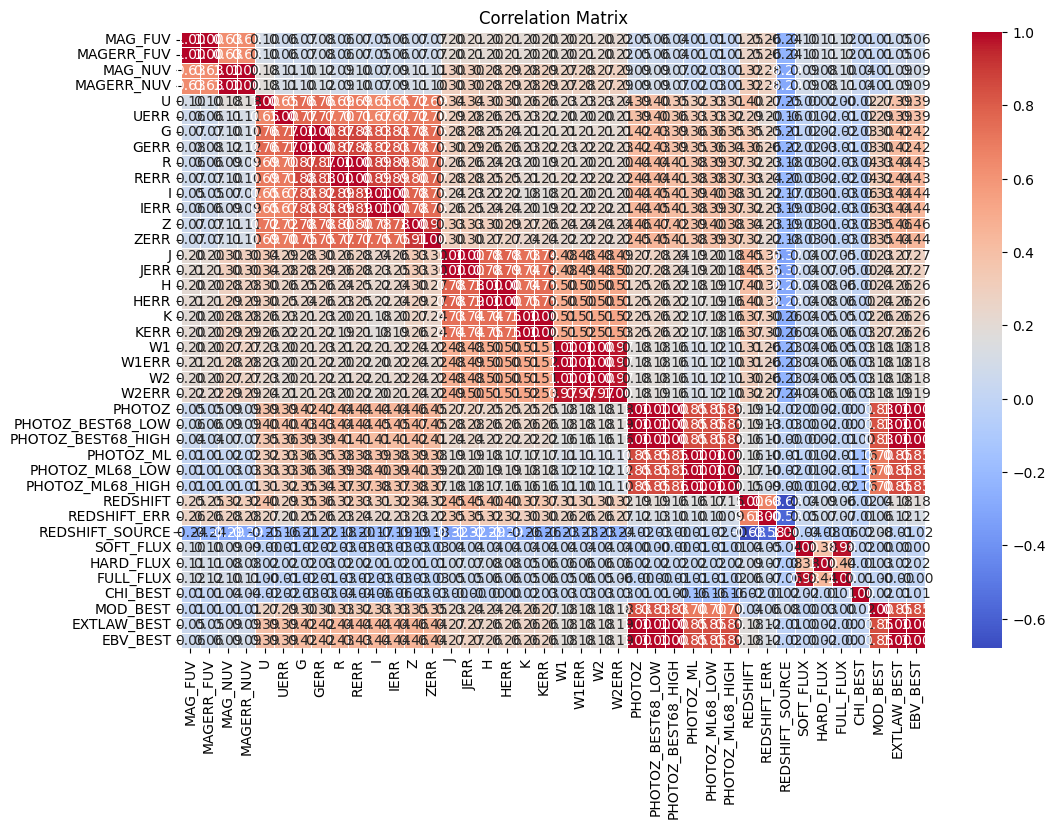

In [32]:
# Calculate and display the correlation matrix
correlation_matrix = df_relevant.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Mean Squared Error: 0.09009306091631493
R-squared: 0.9999639382176063


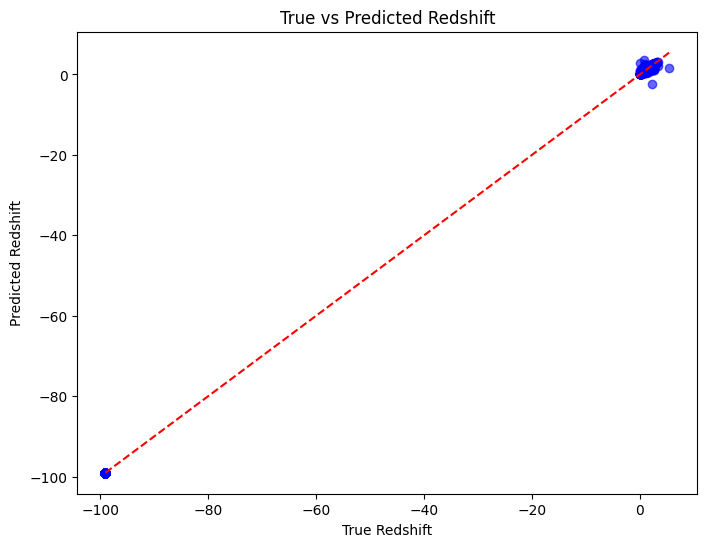

In [33]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare your data (X = features, y = target)
X = df_relevant.drop(['REDSHIFT'], axis=1)  # Drop the target column (REDSHIFT)
y = df_relevant['REDSHIFT']  # Target is the REDSHIFT column

# Ensure X has only numerical data
X = X.select_dtypes(include=np.number)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared (Coefficient of Determination)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, compare predicted vs. actual redshift values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshift')
plt.title('True vs Predicted Redshift')
plt.show()


In [34]:
train_r2 = model.score(X_train, y_train)
print(f"Training R-squared: {train_r2}")

Training R-squared: 0.9998141543789104


In [35]:
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

               Feature    Importance
31     REDSHIFT_SOURCE  9.859524e-01
38            EBV_BEST  1.236981e-03
29    PHOTOZ_ML68_HIGH  1.156916e-03
27           PHOTOZ_ML  1.140433e-03
24              PHOTOZ  9.829416e-04
13                ZERR  9.227991e-04
7                 GERR  9.224466e-04
12                   Z  8.282292e-04
30        REDSHIFT_ERR  7.729861e-04
37         EXTLAW_BEST  6.960268e-04
26  PHOTOZ_BEST68_HIGH  6.872533e-04
36            MOD_BEST  6.090829e-04
6                    G  5.814716e-04
35            CHI_BEST  5.620734e-04
5                 UERR  5.589990e-04
14                   J  5.375028e-04
8                    R  5.188824e-04
28     PHOTOZ_ML68_LOW  4.882510e-04
25   PHOTOZ_BEST68_LOW  4.183453e-04
4                    U  1.591772e-04
9                 RERR  1.587629e-04
11                IERR  1.035419e-04
15                JERR  7.010593e-07
17                HERR  4.613336e-07
18                   K  4.449266e-07
19                KERR  4.422896e-07
1

<ipython-input-36-d2c145dde438>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


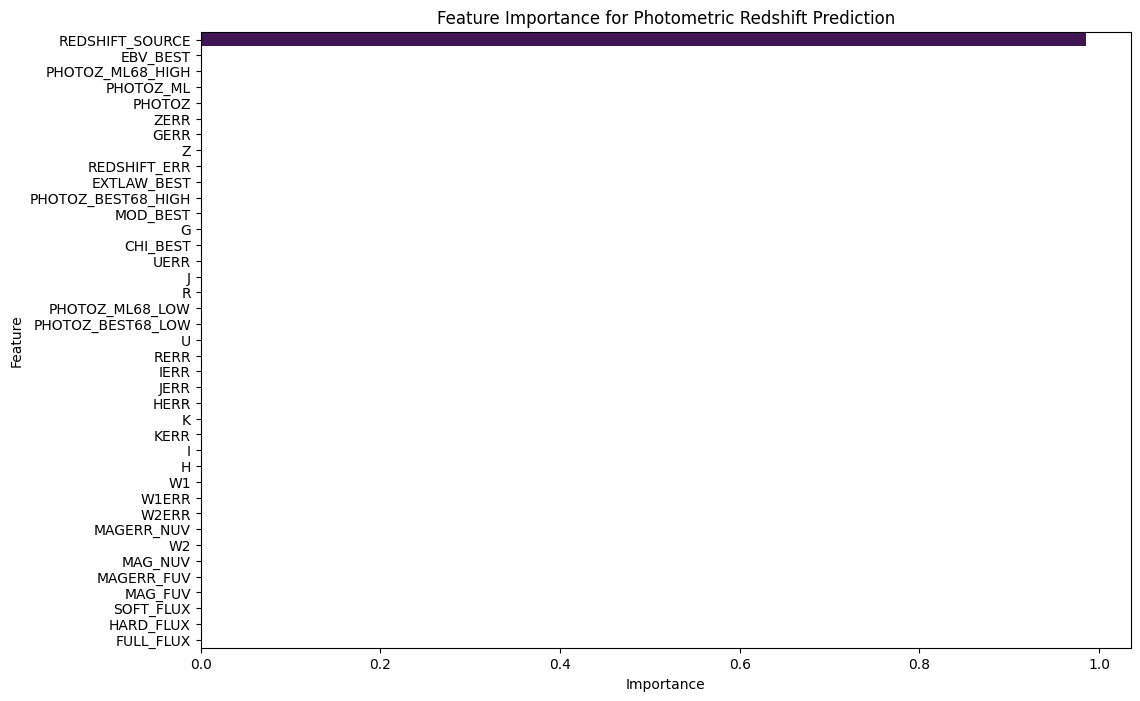

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for easier handling
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Photometric Redshift Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
